In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
!pip install seaborn

In [0]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_data=pd.read_csv('https://raw.githubusercontent.com/Riptide-Trident/ML_model/master/trainms.csv')
train_data.head(20)

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,6,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,7,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,8,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,9,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,10,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [5]:
train_data.columns

Index(['s.no', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [0]:
train_data.drop(['s.no', 'Timestamp', 'leave', 'coworkers', 'benefits', 'care_options', 'anonymity', ],axis=1,inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Age                          1000 non-null int64
Gender                       1000 non-null object
Country                      1000 non-null object
state                        600 non-null object
self_employed                982 non-null object
family_history               1000 non-null object
treatment                    1000 non-null object
work_interfere               774 non-null object
no_employees                 1000 non-null object
remote_work                  1000 non-null object
tech_company                 1000 non-null object
wellness_program             1000 non-null object
seek_help                    1000 non-null object
mental_health_consequence    1000 non-null object
phys_health_consequence      1000 non-null object
supervisor                   1000 non-null object
mental_health_interview      1000 non-null object
phys_health_interview        1000 non-null objec

In [8]:
train_data.isnull()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [9]:
train_data["self_employed"].fillna("No",inplace=True)
train_data.isnull()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


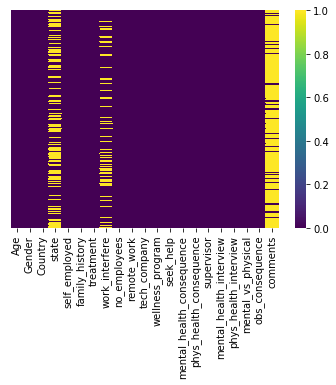

In [10]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap="viridis")

In [0]:
def rem(train_data,field):
    remwork=pd.get_dummies(train_data[field],drop_first=True)
    train_data = pd.concat([train_data,remwork],axis=1)
    train_data.drop([field],axis=1,inplace=True)
    train_data.head()   

In [12]:
state=pd.get_dummies(train_data["state"],drop_first=True)
state.head()

,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
workinter=pd.get_dummies(train_data["work_interfere"],drop_first=True)
workinter.head()

,Often,Rarely,Sometimes
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,0


In [14]:
train_data = pd.concat([train_data,state,workinter],axis=1)

train_data.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Often,Rarely,Sometimes
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,No,Yes,No,No,Yes,No,Maybe,Yes,No,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
train_data.drop(['state','work_interfere'],axis=1,inplace=True)
train_data.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Often,Rarely,Sometimes
0,37,Female,United States,No,No,Yes,6-25,No,Yes,No,Yes,No,No,Yes,No,Maybe,Yes,No,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,44,M,United States,No,No,No,More than 1000,No,No,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,32,Male,Canada,No,No,No,6-25,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,31,Male,United Kingdom,No,Yes,Yes,26-100,No,Yes,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,31,Male,United States,No,No,No,100-500,Yes,Yes,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


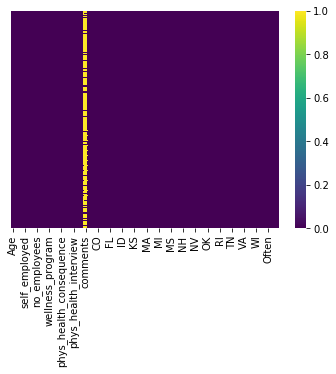

In [16]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap="viridis")

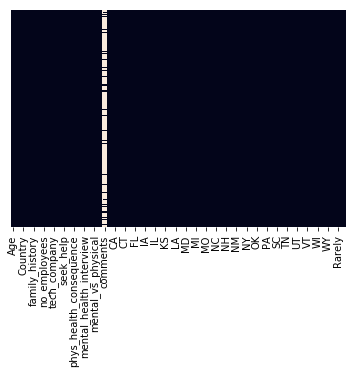

In [17]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [18]:
print(sum(train_data.isnull().sum()))

873


In [19]:
train_data.loc[:, train_data.isna().any()]

,comments
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [20]:
train_data.drop(['comments'],axis=1,inplace=True)
train_data.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Often,Rarely,Sometimes
0,37,Female,United States,No,No,Yes,6-25,No,Yes,No,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,44,M,United States,No,No,No,More than 1000,No,No,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,32,Male,Canada,No,No,No,6-25,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,31,Male,United Kingdom,No,Yes,Yes,26-100,No,Yes,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,31,Male,United States,No,No,No,100-500,Yes,Yes,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [21]:
train_data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
wellness_program             0
seek_help                    0
mental_health_consequence    0
phys_health_consequence      0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
AZ                           0
CA                           0
CO                           0
CT                           0
DC                           0
FL                           0
GA                           0
IA                           0
ID                           0
IL                           0
IN                           0
KS                           0
                            ..
MI                           0
MN      

In [0]:
def convert(str):
    if str=='m' or str=='Male' or str=='male' or str=='Male ' or str=='Mal' or str=='Mail' or str=='Make' or str=='Guy (-ish) ^_^' or str=='maile' or str=='something kinda male?':
        return 'M'
    elif str=='f' or str=='Female' or str=='female' or str=='Femake' or str=='Female ' or str=='Woman' or str=='woman':
        return 'F'
    else:
        return str
train_data["Gender"]=train_data["Gender"].apply(convert)

In [23]:
Gender=pd.get_dummies(train_data["Gender"],drop_first=True)
print(Gender.columns)

Index(['Agender', 'Androgyne', 'Cis Female', 'Cis Male', 'Enby', 'F',
       'Female (cis)', 'Female (trans)', 'Genderqueer', 'M', 'Male-ish', 'Man',
       'Nah', 'Neuter', 'Trans woman', 'Trans-female', 'cis male',
       'cis-female/femme', 'fluid', 'male leaning androgynous', 'msle',
       'non-binary', 'queer'],
      dtype='object')


In [24]:
train_data = pd.concat([train_data,Gender],axis=1)
train_data.drop(['Gender'],axis=1,inplace=True)
train_data.head()

,Age,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,...,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Often,Rarely,Sometimes,Agender,Androgyne,Cis Female,Cis Male,Enby,F,Female (cis),Female (trans),Genderqueer,M,Male-ish,Man,Nah,Neuter,Trans woman,Trans-female,cis male,cis-female/femme,fluid,male leaning androgynous,msle,non-binary,queer
0,37,United States,No,No,Yes,6-25,No,Yes,No,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,44,United States,No,No,No,More than 1000,No,No,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,32,Canada,No,No,No,6-25,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31,United Kingdom,No,Yes,Yes,26-100,No,Yes,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,31,United States,No,No,No,100-500,Yes,Yes,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
country=pd.get_dummies(train_data["Country"],drop_first=True)
country.head()

,Austria,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Colombia,Costa Rica,Croatia,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
train_data = pd.concat([train_data,country],axis=1)
train_data.drop(['Country'],axis=1,inplace=True)
train_data.head()

,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,...,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Colombia,Costa Rica,Croatia,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe
0,37,No,No,Yes,6-25,No,Yes,No,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,44,No,No,No,More than 1000,No,No,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,32,No,No,No,6-25,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31,No,Yes,Yes,26-100,No,Yes,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,31,No,No,No,100-500,Yes,Yes,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
se=pd.get_dummies(train_data["self_employed"],drop_first=True)
se.head()
train_data = pd.concat([train_data,se],axis=1)
train_data.drop(['self_employed'],axis=1,inplace=True)
train_data.head()

,Age,family_history,treatment,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,...,Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Colombia,Costa Rica,Croatia,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes
0,37,No,Yes,6-25,No,Yes,No,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,No,No,More than 1000,No,No,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,32,No,No,6-25,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31,Yes,Yes,26-100,No,Yes,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,31,No,No,100-500,Yes,Yes,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
famhis=pd.get_dummies(train_data["family_history"],drop_first=True)
famhis.head()
train_data = pd.concat([train_data,famhis],axis=1)
train_data.drop(['family_history'],axis=1,inplace=True)
train_data.head()

,Age,treatment,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,...,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Colombia,Costa Rica,Croatia,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes
0,37,Yes,6-25,No,Yes,No,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,44,No,More than 1000,No,No,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,32,No,6-25,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31,Yes,26-100,No,Yes,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,31,No,100-500,Yes,Yes,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
remwork=pd.get_dummies(train_data["remote_work"],drop_first=True)
remwork.head()
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['remote_work'],axis=1,inplace=True)
train_data.head()

,Age,treatment,no_employees,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,...,Brazil,Bulgaria,Canada,Colombia,Costa Rica,Croatia,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes
0,37,Yes,6-25,Yes,No,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,44,No,More than 1000,No,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,32,No,6-25,Yes,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31,Yes,26-100,Yes,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,31,No,100-500,Yes,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [30]:
print(train_data.columns)

Index(['Age', 'treatment', 'no_employees', 'tech_company', 'wellness_program',
       'seek_help', 'mental_health_consequence', 'phys_health_consequence',
       'supervisor', 'mental_health_interview',
       ...
       'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States',
       'Uruguay', 'Zimbabwe', 'Yes', 'Yes', 'Yes'],
      dtype='object', length=127)


In [31]:
remwork=pd.get_dummies(train_data["tech_company"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['tech_company'],axis=1,inplace=True)
train_data.head()

,Age,treatment,no_employees,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,...,Bulgaria,Canada,Colombia,Costa Rica,Croatia,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes
0,37,Yes,6-25,No,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,No,More than 1000,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,32,No,6-25,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,31,Yes,26-100,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,31,No,100-500,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [32]:
remwork=pd.get_dummies(train_data["no_employees"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['no_employees'],axis=1,inplace=True)
train_data.head()

,Age,treatment,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,...,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000
0,37,Yes,No,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,44,No,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,32,No,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,31,Yes,No,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
4,31,No,Don't know,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0


In [33]:
remwork=pd.get_dummies(train_data["wellness_program"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['wellness_program'],axis=1,inplace=True)
train_data.head()

,Age,treatment,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,...,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes
0,37,Yes,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
1,44,No,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,32,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,31,Yes,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
4,31,No,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0


In [34]:
train_data.head()

,Age,treatment,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,...,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes
0,37,Yes,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
1,44,No,Don't know,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,32,No,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,31,Yes,No,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
4,31,No,Don't know,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0


In [35]:
remwork=pd.get_dummies(train_data["seek_help"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['seek_help'],axis=1,inplace=True)
train_data.head()

,Age,treatment,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,...,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes
0,37,Yes,No,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
1,44,No,Maybe,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,32,No,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
3,31,Yes,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0
4,31,No,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0


In [36]:
remwork=pd.get_dummies(train_data["mental_health_consequence"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['mental_health_consequence'],axis=1,inplace=True)
train_data.head()

,Age,treatment,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,...,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes
0,37,Yes,No,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0
1,44,No,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,32,No,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
3,31,Yes,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
4,31,No,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0


In [37]:
remwork=pd.get_dummies(train_data["phys_health_consequence"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['phys_health_consequence'],axis=1,inplace=True)
train_data.head()

,Age,treatment,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,...,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes
0,37,Yes,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0
1,44,No,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,32,No,Yes,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
3,31,Yes,No,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1
4,31,No,Yes,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0


In [38]:
remwork=pd.get_dummies(train_data["supervisor"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['supervisor'],axis=1,inplace=True)
train_data.head()

,Age,treatment,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,...,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes
0,37,Yes,No,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1
1,44,No,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,32,No,Yes,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
3,31,Yes,Maybe,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0
4,31,No,Yes,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [39]:
remwork=pd.get_dummies(train_data["mental_health_interview"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['mental_health_interview'],axis=1,inplace=True)
train_data.head()

,Age,treatment,phys_health_interview,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,...,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes,No,Yes
0,37,Yes,Maybe,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0
1,44,No,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,32,No,Yes,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
3,31,Yes,Maybe,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0
4,31,No,Yes,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1


In [40]:
remwork=pd.get_dummies(train_data["phys_health_interview"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['phys_health_interview'],axis=1,inplace=True)
train_data.head()

,Age,treatment,mental_vs_physical,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,...,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes,No,Yes,No,Yes
0,37,Yes,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0
1,44,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,32,No,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1
3,31,Yes,No,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
4,31,No,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1


In [41]:
remwork=pd.get_dummies(train_data["mental_vs_physical"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['mental_vs_physical'],axis=1,inplace=True)
train_data.head()

,Age,treatment,obs_consequence,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,...,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes,No,Yes,No,Yes,No,Yes
0,37,Yes,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1
1,44,No,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,32,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,31,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
4,31,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0


In [42]:
remwork=pd.get_dummies(train_data["obs_consequence"],drop_first=True)
train_data = pd.concat([train_data,remwork],axis=1)
train_data.drop(['obs_consequence'],axis=1,inplace=True)
train_data.head()

,Age,treatment,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,...,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes,No,Yes,No,Yes,No,Yes,Yes
0,37,Yes,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0
1,44,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,32,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0
3,31,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1
4,31,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0


In [43]:
train_data["treatment"]=train_data["treatment"].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else -1)
train_data

,Age,treatment,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,...,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes,No,Yes,No,Yes,No,Yes,Yes
0,37,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0
1,44,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0
3,31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1
4,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0
5,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0
6,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
8,42,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0
9,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [0]:
Y=train_data["treatment"]
X=train_data.drop(['treatment'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier(n_estimators=1000,criterion = 'entropy',random_state=0)
regressor.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [47]:
Y_pred=regressor.predict(X_test)
mean_squared_error(Y_test,Y_pred)

0.175

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
regressor=ExtraTreesClassifier(n_estimators=1000,max_features= 100,criterion= 'entropy',min_samples_split= 2,max_depth= 50, min_samples_leaf= 5)
regressor.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=50, max_features=100, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [49]:
Y_pred=regressor.predict(X_test)
mean_squared_error(Y_test,Y_pred)

0.145

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.855

In [51]:
for item in Y_pred:
    print("Yes" if item==1 else "No")

No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
No
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
No
No
No
No
No
Yes
No
No
Yes
Yes
Yes
No
No
No
No
Yes
Yes
No
No
Yes
No
Yes
Yes
No
No
No
No
Yes
No
Yes
No
No
Yes
Yes
No
No
Yes
Yes
No
No
No
Yes
No
Yes
No
Yes
Yes
No
No
Yes
No
No
Yes
No
No
Yes
No
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
No
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
No
No
No
No
Yes
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
No
No
Yes
No
Yes
No
Yes
No
No
No
Yes
No
No
Yes
Yes
No
No
No
Yes
Yes
No
Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
No
Yes
No
Yes
No
No
No
No
Yes
No
No
No
No
Yes
No
Yes
Yes
No
No
No
No
Yes
No
No
Yes
No
Yes
No
Yes
No
No


In [52]:
!pip install seaborn

In [0]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
test_data=pd.read_csv('https://raw.githubusercontent.com/Riptide-Trident/ML_model/master/testms.csv')
test_data.head(20)

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-29 09:29:37,25,Male,United States,PA,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,Don't know,Yes,Somewhat easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN
1,2,2014-08-29 09:31:37,42,male,United States,IN,No,Yes,Sometimes,6-25,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
2,3,2014-08-29 09:31:49,34,male,United States,PA,No,Yes,Often,100-500,No,Yes,Yes,Yes,No,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN
3,4,2014-08-29 09:33:43,26,female,United States,OH,No,No,Sometimes,26-100,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,No,Maybe,Maybe,Don't know,Yes,NaN
4,5,2014-08-29 09:35:46,35,Male,United Kingdom,NaN,No,Yes,Sometimes,1-5,No,Yes,No,Yes,No,No,Yes,Very easy,Yes,Yes,Some of them,Some of them,No,Maybe,Yes,Yes,NaN
5,6,2014-08-29 09:36:04,34,Male,United Kingdom,NaN,No,No,Never,500-1000,No,Yes,Don't know,No,No,Don't know,Don't know,Very easy,Maybe,No,Yes,Yes,No,No,Yes,No,NaN
6,7,2014-08-29 09:36:46,38,m,United States,PA,No,Yes,Sometimes,100-500,Yes,No,Yes,Yes,No,Yes,Yes,Very easy,No,No,Yes,Yes,Yes,Yes,Don't know,No,While mental health is a part of our insurance...
7,8,2014-08-29 09:40:13,34,M,United States,SD,No,No,Sometimes,100-500,No,Yes,Don't know,No,No,No,Don't know,Don't know,Yes,No,Some of them,No,No,Maybe,Don't know,No,NaN
8,9,2014-08-29 09:42:23,39,M,United States,IN,No,Yes,Sometimes,6-25,Yes,Yes,No,Yes,No,No,Yes,Somewhat easy,No,No,Some of them,Yes,Maybe,Yes,Yes,No,NaN
9,10,2014-08-29 09:46:56,44,F,United States,CA,No,No,NaN,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Don't know,Yes,No,No,No,No,No,Don't know,No,NaN


In [55]:
test_data.columns

Index(['s.no', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [0]:
test_data.drop(['s.no', 'Timestamp', 'leave', 'coworkers', 'benefits', 'care_options', 'anonymity', ],axis=1,inplace=True)

In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 20 columns):
Age                          259 non-null int64
Gender                       259 non-null object
Country                      259 non-null object
state                        144 non-null object
self_employed                259 non-null object
family_history               259 non-null object
work_interfere               221 non-null object
no_employees                 259 non-null object
remote_work                  259 non-null object
tech_company                 259 non-null object
wellness_program             259 non-null object
seek_help                    259 non-null object
mental_health_consequence    259 non-null object
phys_health_consequence      259 non-null object
supervisor                   259 non-null object
mental_health_interview      259 non-null object
phys_health_interview        259 non-null object
mental_vs_physical           259 non-null object
obs_consequenc

In [58]:
test_data.isnull()

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [59]:
test_data["self_employed"].fillna("No",inplace=True)
test_data.isnull()

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


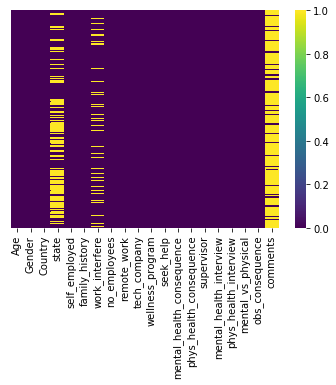

In [60]:
sns.heatmap(test_data.isnull(),yticklabels=False,cmap="viridis")

In [0]:
def rem(test_data,field):
    remwork=pd.get_dummies(test_data[field],drop_first=True)
    test_data = pd.concat([test_data,remwork],axis=1)
    test_data.drop([field],axis=1,inplace=True)
    test_data.head()   

In [62]:
state=pd.get_dummies(test_data["state"],drop_first=True)
state.head()

,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
workinter=pd.get_dummies(test_data["work_interfere"],drop_first=True)
workinter.head()

,Often,Rarely,Sometimes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [64]:
test_data = pd.concat([test_data,state,workinter],axis=1)

test_data.head()

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes
0,25,Male,United States,PA,No,Yes,Often,6-25,Yes,Yes,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,42,male,United States,IN,No,Yes,Sometimes,6-25,Yes,Yes,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,34,male,United States,PA,No,Yes,Often,100-500,No,Yes,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,26,female,United States,OH,No,No,Sometimes,26-100,Yes,Yes,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35,Male,United Kingdom,NaN,No,Yes,Sometimes,1-5,No,Yes,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
test_data.drop(['state','work_interfere'],axis=1,inplace=True)
test_data.head()

,Age,Gender,Country,self_employed,family_history,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes
0,25,Male,United States,No,Yes,6-25,Yes,Yes,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,42,male,United States,No,Yes,6-25,Yes,Yes,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,34,male,United States,No,Yes,100-500,No,Yes,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,26,female,United States,No,No,26-100,Yes,Yes,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35,Male,United Kingdom,No,Yes,1-5,No,Yes,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


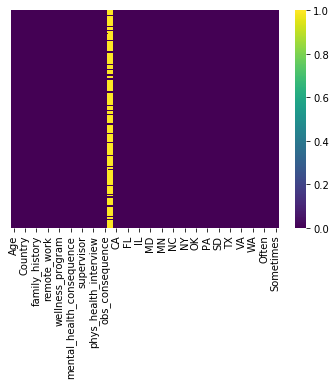

In [66]:
sns.heatmap(test_data.isnull(),yticklabels=False,cmap="viridis")

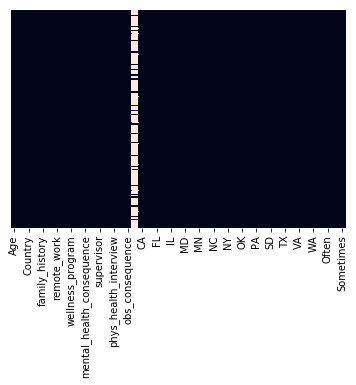

In [67]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False)

In [68]:
print(sum(test_data.isnull().sum()))

222


In [69]:
test_data.loc[:, test_data.isna().any()]

,comments
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,While mental health is a part of our insurance...
7,NaN
8,NaN
9,NaN


In [70]:
test_data.drop(['comments'],axis=1,inplace=True)
test_data.head()

,Age,Gender,Country,self_employed,family_history,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes
0,25,Male,United States,No,Yes,6-25,Yes,Yes,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,42,male,United States,No,Yes,6-25,Yes,Yes,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,34,male,United States,No,Yes,100-500,No,Yes,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,26,female,United States,No,No,26-100,Yes,Yes,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35,Male,United Kingdom,No,Yes,1-5,No,Yes,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
test_data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
no_employees                 0
remote_work                  0
tech_company                 0
wellness_program             0
seek_help                    0
mental_health_consequence    0
phys_health_consequence      0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
CA                           0
CT                           0
FL                           0
GA                           0
IL                           0
IN                           0
MD                           0
MI                           0
MN                           0
MO                           0
NC                           0
NJ                           0
NY                           0
OH                           0
OK                           0
OR      

In [0]:
def convert(str):
    if str=='m' or str=='Male' or str=='male' or str=='Male ' or str=='Mal' or str=='Mail' or str=='Make' or str=='Guy (-ish) ^_^' or str=='maile' or str=='something kinda male?':
        return 'M'
    elif str=='f' or str=='Female' or str=='female' or str=='Femake' or str=='Female ' or str=='Woman' or str=='woman':
        return 'F'
    else:
        return str
test_data["Gender"]=test_data["Gender"].apply(convert)

In [73]:
Gender=pd.get_dummies(test_data["Gender"],drop_first=True)
print(Gender.columns)

Index(['F', 'Female (trans)', 'M', 'Malr', 'femail',
       'ostensibly male, unsure what that really means', 'p'],
      dtype='object')


In [74]:
test_data = pd.concat([test_data,Gender],axis=1)
test_data.drop(['Gender'],axis=1,inplace=True)
test_data.head()

,Age,Country,self_employed,family_history,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p
0,25,United States,No,Yes,6-25,Yes,Yes,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,42,United States,No,Yes,6-25,Yes,Yes,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,34,United States,No,Yes,100-500,No,Yes,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,26,United States,No,No,26-100,Yes,Yes,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,35,United Kingdom,No,Yes,1-5,No,Yes,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [75]:
country=pd.get_dummies(test_data["Country"],drop_first=True)
country.head()

,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [76]:
test_data = pd.concat([test_data,country],axis=1)
test_data.drop(['Country'],axis=1,inplace=True)
test_data.head()

,Age,self_employed,family_history,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States
0,25,No,Yes,6-25,Yes,Yes,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,42,No,Yes,6-25,Yes,Yes,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,34,No,Yes,100-500,No,Yes,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,26,No,No,26-100,Yes,Yes,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35,No,Yes,1-5,No,Yes,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
se=pd.get_dummies(test_data["self_employed"],drop_first=True)
se.head()
test_data = pd.concat([test_data,se],axis=1)
test_data.drop(['self_employed'],axis=1,inplace=True)
test_data.head()

,Age,family_history,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes
0,25,Yes,6-25,Yes,Yes,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,42,Yes,6-25,Yes,Yes,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,34,Yes,100-500,No,Yes,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,26,No,26-100,Yes,Yes,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,35,Yes,1-5,No,Yes,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [78]:
famhis=pd.get_dummies(test_data["family_history"],drop_first=True)
famhis.head()
test_data = pd.concat([test_data,famhis],axis=1)
test_data.drop(['family_history'],axis=1,inplace=True)
test_data.head()

,Age,no_employees,remote_work,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes
0,25,6-25,Yes,Yes,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,42,6-25,Yes,Yes,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,34,100-500,No,Yes,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,26,26-100,Yes,Yes,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,35,1-5,No,Yes,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [79]:
remwork=pd.get_dummies(test_data["remote_work"],drop_first=True)
remwork.head()
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['remote_work'],axis=1,inplace=True)
test_data.head()

,Age,no_employees,tech_company,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes
0,25,6-25,Yes,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1,42,6-25,Yes,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,34,100-500,Yes,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,26,26-100,Yes,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,35,1-5,Yes,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [80]:
print(test_data.columns)

Index(['Age', 'no_employees', 'tech_company', 'wellness_program', 'seek_help',
       'mental_health_consequence', 'phys_health_consequence', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'CA', 'CT', 'FL', 'GA', 'IL',
       'IN', 'MD', 'MI', 'MN', 'MO', 'NC', 'NJ', 'NY', 'OH', 'OK', 'OR', 'PA',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'Often', 'Rarely',
       'Sometimes', 'F', 'Female (trans)', 'M', 'Malr', 'femail',
       'ostensibly male, unsure what that really means', 'p', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Croatia',
       'Czech Republic', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'India', 'Ireland', 'Israel', 'Italy', 'Moldova', 'Netherlands',
       'New Zealand', 'Philippines', 'Poland', 'Singapore', 'South Africa',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States', 'Yes',
       'Yes', 'Yes'],
      dtype='obj

In [81]:
remwork=pd.get_dummies(test_data["tech_company"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['tech_company'],axis=1,inplace=True)
test_data.head()

,Age,no_employees,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes
0,25,6-25,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
1,42,6-25,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
2,34,100-500,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,26,26-100,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,35,1-5,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [82]:
remwork=pd.get_dummies(test_data["no_employees"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['no_employees'],axis=1,inplace=True)
test_data.head()

,Age,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,...,femail,"ostensibly male, unsure what that really means",p,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000
0,25,No,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0
1,42,No,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0
2,34,No,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0
3,26,No,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0
4,35,No,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [83]:
remwork=pd.get_dummies(test_data["wellness_program"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['wellness_program'],axis=1,inplace=True)
test_data.head()

,Age,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),...,p,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes
0,25,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0
1,42,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0
2,34,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0
3,26,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0
4,35,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0


In [84]:
test_data.head()

,Age,seek_help,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),...,p,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes
0,25,Don't know,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0
1,42,Don't know,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0
2,34,No,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0
3,26,Don't know,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0
4,35,No,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0


In [85]:
remwork=pd.get_dummies(test_data["seek_help"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['seek_help'],axis=1,inplace=True)
test_data.head()

,Age,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,...,Brazil,Bulgaria,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes
0,25,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0
1,42,Maybe,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0
2,34,No,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0
3,26,Maybe,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0
4,35,Yes,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0


In [86]:
remwork=pd.get_dummies(test_data["mental_health_consequence"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['mental_health_consequence'],axis=1,inplace=True)
test_data.head()

,Age,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,...,Canada,China,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes
0,25,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0
1,42,No,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0
2,34,No,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0
3,26,No,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,35,Yes,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1


In [87]:
remwork=pd.get_dummies(test_data["phys_health_consequence"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['phys_health_consequence'],axis=1,inplace=True)
test_data.head()

,Age,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,...,Colombia,Croatia,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes
0,25,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,42,Yes,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0
2,34,Yes,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0
3,26,No,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
4,35,Some of them,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1


In [88]:
remwork=pd.get_dummies(test_data["supervisor"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['supervisor'],axis=1,inplace=True)
test_data.head()

,Age,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",...,Czech Republic,Finland,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes
0,25,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
1,42,No,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
2,34,Maybe,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1
3,26,Maybe,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,35,No,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0


In [89]:
remwork=pd.get_dummies(test_data["mental_health_interview"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['mental_health_interview'],axis=1,inplace=True)
test_data.head()

,Age,phys_health_interview,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p,...,France,Georgia,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes,No,Yes
0,25,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
1,42,Maybe,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0
2,34,Maybe,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,26,Maybe,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,35,Maybe,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0


In [90]:
remwork=pd.get_dummies(test_data["phys_health_interview"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['phys_health_interview'],axis=1,inplace=True)
test_data.head()

,Age,mental_vs_physical,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p,Belgium,...,Germany,Greece,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes,No,Yes,No,Yes
0,25,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
1,42,Don't know,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0
2,34,Don't know,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
3,26,Don't know,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,35,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0


In [91]:
remwork=pd.get_dummies(test_data["mental_vs_physical"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['mental_vs_physical'],axis=1,inplace=True)
test_data.head()

,Age,obs_consequence,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p,Belgium,Brazil,...,India,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes,No,Yes,No,Yes,No,Yes
0,25,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,42,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
2,34,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
3,26,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,35,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1


In [92]:
remwork=pd.get_dummies(test_data["obs_consequence"],drop_first=True)
test_data = pd.concat([test_data,remwork],axis=1)
test_data.drop(['obs_consequence'],axis=1,inplace=True)
test_data.head()

,Age,CA,CT,FL,GA,IL,IN,MD,MI,MN,MO,NC,NJ,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,Often,Rarely,Sometimes,F,Female (trans),M,Malr,femail,"ostensibly male, unsure what that really means",p,Belgium,Brazil,Bulgaria,...,Ireland,Israel,Italy,Moldova,Netherlands,New Zealand,Philippines,Poland,Singapore,South Africa,Sweden,Switzerland,United Kingdom,United States,Yes,Yes,Yes,Yes,100-500,26-100,500-1000,6-25,More than 1000,No,Yes,No,Yes,No,Yes,No,Yes,Some of them,Yes,No,Yes,No,Yes,No,Yes,Yes
0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
1,42,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
2,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1


In [94]:
Y_pred=regressor.predict(test_data)


ValueError: ignored

In [0]:
for item in Y_pred:
    print("Yes" if item==1 else "No")